In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [222]:
df=pd.read_csv(r'Air_Traffic_Passenger_Statistics.csv')

In [223]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [224]:
df.drop('Activity Period', axis=1, inplace=True)

In [225]:
df.isna().sum()

Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [301]:
df['Operating Airline IATA Code'].fillna(df['Operating Airline IATA Code'].mode()[0], inplace=True)

In [227]:
df['Published Airline IATA Code'].value_counts()

UA     3752
AS      969
DL      803
AA      416
US      407
       ... 
BBB       6
WO        3
5Y        2
XP        2
EZ        2
Name: Published Airline IATA Code, Length: 64, dtype: int64

In [228]:
df['Published Airline IATA Code'].fillna(df['Published Airline IATA Code'].mode()[0], inplace=True)

In [168]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df)
profile.to_file(r'C:\Users\Acer\Downloads\cluster.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [229]:
df['Passenger Count'].value_counts()

2        11
10       10
1         9
7         8
40        8
         ..
6864      1
10998     1
27970     1
29221     1
10898     1
Name: Passenger Count, Length: 11699, dtype: int64

In [230]:
#normalization
df.columns
for c in ['Passenger Count', 'Adjusted Passenger Count' ]:
    df[c]=(df[c] - df[c].mean()) / df[c].std()

In [231]:
def getProportionCA(df, column):
    values = dict( df[ column ].value_counts() )
    for v in values:
        values[v] = values[v] / len(df)

    df[column] = df[column].map( values )

    return 

In [232]:
for c in df.select_dtypes(exclude=np.number):
    getProportionCA(df, c)

In [233]:
from sklearn.cluster import KMeans

In [432]:
km = KMeans(
    n_clusters=5, init='random',
    n_init=20, max_iter=300, 
    tol=1e-04, random_state=0
)
km = km.fit(df)

In [433]:
df['Label']=km.labels_

In [434]:
df.columns

Index(['Operating Airline', 'Operating Airline IATA Code', 'Published Airline',
       'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
       'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month', 'labels', 'Label'],
      dtype='object')

In [435]:
df.groupby('Label').agg({'Operating Airline':'mean', 'Operating Airline IATA Code':'mean',
       'Published Airline':'mean', 'Published Airline IATA Code':'mean', 'GEO Summary':'mean',
       'GEO Region':'mean', 'Activity Type Code':'mean', 'Price Category Code':'mean', 'Terminal':'mean',
       'Boarding Area':'mean', 'Passenger Count':'mean', 'Adjusted Activity Type Code':'mean',
       'Adjusted Passenger Count':'mean', 'Year':'mean', 'Month':'mean'})

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
Label,,,,,,,,,,,,,,,
0,0.045132,0.059506,0.059561,0.079909,0.519558,0.242838,0.433720,0.779181,0.424298,0.218174,-0.181856,0.433720,-0.180319,2006.205684,0.083888
1,0.028237,0.056263,0.034024,0.077009,0.536196,0.220799,0.455171,0.780064,0.468714,0.240027,0.072856,0.455171,0.071606,2014.687950,0.083394
2,0.133845,0.206570,0.164444,0.253615,0.386286,0.386286,0.469339,0.872060,0.147798,0.091757,5.868090,0.469339,5.870078,2009.474654,0.083429
3,0.041713,0.057229,0.055574,0.080263,0.531985,0.225423,0.447917,0.768235,0.461122,0.237885,-0.087742,0.447917,-0.088099,2011.490377,0.083331
4,0.044876,0.059215,0.059006,0.079795,0.520712,0.240920,0.436016,0.779647,0.432511,0.219523,-0.148062,0.436016,-0.147974,2008.492801,0.083347


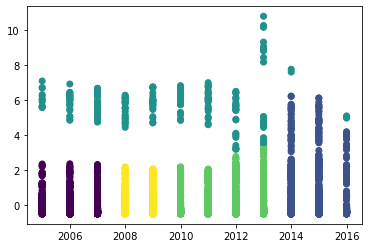

In [436]:
plt.scatter( df['Year'], df['Passenger Count'],c = df['Label'] )

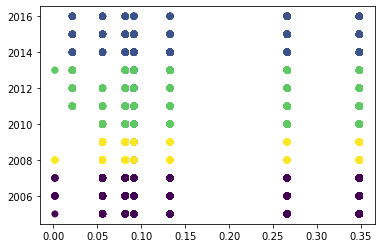

In [437]:
plt.scatter( df['Boarding Area'], df['Year'],c = df['Label'] )

In [438]:
centroids = {}


for g in df.groupby('Label'): # split the dataframe into sub categories according to "LABELS"
    groupindex = g[0]
    groupdataframe = g[1]
    d = dict(groupdataframe.mean().to_dict())
    del d['Label']
    centroids[ groupindex ] = d

In [439]:
def euclidean_distance(x,y):
    return np.linalg.norm(x-y)

In [440]:
import itertools
columns = list(centroids.keys())
combinations = list(itertools.combinations(columns, 2))

In [441]:
combinations

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [442]:

distances = []
for c in combinations:
    #print(c[0])
    first = c[0]
    second = c[1]
    dis = euclidean_distance(np.array(list(centroids[ first ].values())), np.array(list(centroids[ second ].values())) )
    distances.append( dis )
print(combinations)
print(distances)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[16.585673355320132, 11.368881110396504, 9.37803387268572, 4.607947005190247, 12.301904354376468, 7.2492919266767615, 11.979153431421791, 8.737320343655277, 8.999208860485505, 4.798607813262551]


In [443]:
between_distance = np.mean( distances )
print("between_distance of clusters", between_distance)

between_distance of clusters 9.600602207347096


In [444]:
import random

In [445]:
withindistances = []


for g in df.groupby('Label'):
    groupindex = g[0]
    groupdataframe = g[1]
    del groupdataframe['Label']

    ingroupdistances = []
    for i in range(20): # RANDOMLY SELECT 10 ITEMS
        index1 = random.randint(0, len(groupdataframe) - 1)
        index2 = random.randint(0, len(groupdataframe) - 1)
        d = euclidean_distance( np.array(list(groupdataframe.iloc[index1].to_dict().values())), np.array(list(groupdataframe.iloc[index2].to_dict().values()))  )
        ingroupdistances.append( d )

    ingroupdistances = np.mean( ingroupdistances )
    withindistances.append( ingroupdistances )


In [446]:
withindistances

[1.247330744088846,
 1.720235136083767,
 7.812513418496424,
 2.4713824610957538,
 1.2054614555747514]

In [447]:
within_distance = np.mean(withindistances)
print("within_distance", within_distance) 

print( between_distance / within_distance )

within_distance 2.891384643067908
3.3204168218727075


In [448]:
df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,labels,Label
0,0.002932,0.002932,0.002932,0.002932,0.386286,0.386286,0.471180,0.12794,0.215966,0.132805,-0.033771,0.471180,-0.035360,2005,0.086826,0,0
1,0.002932,0.002932,0.002932,0.002932,0.386286,0.386286,0.467515,0.12794,0.215966,0.132805,-0.001878,0.467515,-0.003447,2005,0.086826,0,0
2,0.002932,0.002932,0.002932,0.002932,0.386286,0.386286,0.061305,0.12794,0.215966,0.132805,-0.408534,0.061305,-0.317443,2005,0.086826,0,0
3,0.024389,0.024389,0.025322,0.025322,0.613714,0.094489,0.471180,0.87206,0.215966,0.132805,0.101432,0.471180,0.099926,2005,0.086826,0,0
4,0.024389,0.024389,0.025322,0.025322,0.613714,0.094489,0.467515,0.87206,0.215966,0.132805,0.083154,0.467515,0.081636,2005,0.086826,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,0.024122,0.024122,0.024122,0.024122,0.386286,0.386286,0.467515,0.12794,0.021590,0.021590,2.836023,0.467515,2.836174,2016,0.083494,16,1
15003,0.024122,0.024122,0.024122,0.024122,0.613714,0.074299,0.471180,0.12794,0.612847,0.348171,-0.429556,0.471180,-0.431385,2016,0.083494,16,1
15004,0.024122,0.024122,0.024122,0.024122,0.613714,0.074299,0.467515,0.12794,0.021590,0.021590,-0.420914,0.467515,-0.422738,2016,0.083494,16,1
15005,0.017192,0.017192,0.017192,0.017192,0.613714,0.139202,0.471180,0.87206,0.612847,0.348171,-0.290255,0.471180,-0.291999,2016,0.083494,16,1


In [449]:
df['Label'].value_counts()

3    5404
0    3413
1    3195
4    2778
2     217
Name: Label, dtype: int64

___

___

In [408]:
df=pd.read_csv(r'Air_Traffic_Passenger_Statistics.csv').drop('Activity Period', axis=1)

In [409]:
df['Operating Airline IATA Code'].fillna(df['Operating Airline IATA Code'].mode()[0], inplace=True)

In [410]:
df['Published Airline IATA Code'].fillna(df['Published Airline IATA Code'].mode()[0], inplace=True)

In [411]:
#normalization
df.columns
for c in ['Passenger Count', 'Adjusted Passenger Count' ]:
    df[c]=(df[c] - df[c].mean()) / df[c].std()

In [412]:
def getProportionCA(df, column):
    values = dict( df[ column ].value_counts() )
    for v in values:
        values[v] = values[v] / len(df)

    df[column] = df[column].map( values )

    return 

In [413]:
for c in df.select_dtypes(exclude=np.number):
    getProportionCA(df, c)

In [414]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=8).fit(df)
labels = list(clustering.labels_)

In [415]:
df['labels'] = labels
import collections
counter = collections.Counter(labels)
print(counter)


Counter({0: 3413, 14: 2782, 4: 2778, 8: 2704, 6: 1366, 9: 1359, 16: 359, 15: 44, 2: 24, 3: 24, 5: 24, 7: 24, 10: 24, 11: 24, 12: 20, 1: 11, 17: 10, -1: 9, 13: 8})


In [416]:
df.groupby('labels').agg({'Operating Airline':'mean', 'Operating Airline IATA Code':'mean',
       'Published Airline':'mean', 'Published Airline IATA Code':'mean', 'GEO Summary':'mean',
       'GEO Region':'mean', 'Activity Type Code':'mean', 'Price Category Code':'mean', 'Terminal':'mean',
       'Boarding Area':'mean', 'Passenger Count':'mean', 'Adjusted Activity Type Code':'mean',
       'Adjusted Passenger Count':'mean', 'Year':'mean', 'Month':'mean'})

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
labels,,,,,,,,,,,,,,,
-1,0.068783,0.206570,0.085153,0.253615,0.386286,0.386286,0.469551,0.872060,0.147798,0.091757,8.233857,0.469551,8.237279,2013.000000,0.085671
0,0.045132,0.059506,0.059561,0.079909,0.519558,0.242838,0.433720,0.779181,0.424298,0.218174,-0.181856,0.433720,-0.180319,2006.205684,0.083888
1,0.143533,0.206570,0.176251,0.253615,0.386286,0.386286,0.469181,0.872060,0.147798,0.091757,6.045339,0.469181,6.047435,2005.000000,0.085724
2,0.143533,0.206570,0.176251,0.253615,0.386286,0.386286,0.469348,0.872060,0.147798,0.091757,5.909653,0.469348,5.911667,2006.000000,0.083333
3,0.143533,0.206570,0.176251,0.253615,0.386286,0.386286,0.469348,0.872060,0.147798,0.091757,5.851483,0.469348,5.853461,2007.000000,0.083333
4,0.044876,0.059215,0.059006,0.079795,0.520712,0.240920,0.436016,0.779647,0.432511,0.219523,-0.148062,0.436016,-0.147974,2008.492801,0.083347
5,0.143533,0.206570,0.176251,0.253615,0.386286,0.386286,0.469348,0.872060,0.147798,0.091757,5.504073,0.469348,5.505841,2008.000000,0.083333
6,0.044242,0.060544,0.058549,0.082211,0.531300,0.225591,0.443974,0.762022,0.456566,0.234767,-0.101634,0.443974,-0.101787,2011.000000,0.083302
7,0.143533,0.206570,0.176251,0.253615,0.386286,0.386286,0.469348,0.872060,0.147798,0.091757,5.875486,0.469348,5.877479,2009.000000,0.083333


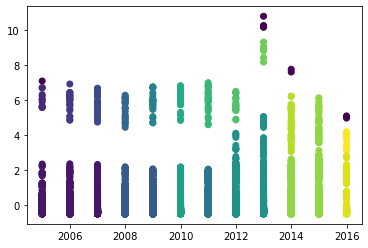

In [417]:
plt.scatter( df['Year'], df['Passenger Count'],c = df['labels'] )

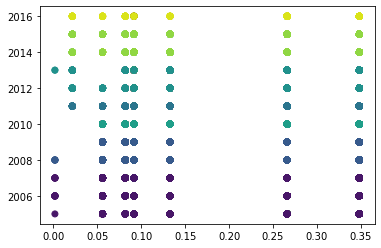

In [418]:
plt.scatter( df['Boarding Area'], df['Year'],c = df['labels'] )